In [1]:
import pandas as pd
import numpy as np

In [2]:
ireland = pd.read_csv('data/IrelandSlaughterNumberMonthly.csv')
ireland.Month = pd.to_datetime(ireland.Month, format='%YM%m')
ireland.UNIT = ireland.UNIT.str[4:]
ireland = ireland[ireland.UNIT == 'Tonnes']
ireland.drop(columns=['Statistic', 'UNIT'], inplace=True)

ireland = ireland[ireland.Month >= '2003-01-01']
ireland.reset_index(drop=True, inplace=True)


In [3]:
animalTypes = ireland['Type of Animal'].unique()
animalTypes

array(['Sheep', 'Pigs', 'Bullocks', 'Bulls', 'Cows', 'Heifers', 'Calves',
       'Lambs', 'Cattle (Including Calves)', 'Cattle without Calves'],
      dtype=object)

In [4]:
#ireland['Type of Animal'] = 'Ireland ' + ireland['Type of Animal']

In [5]:
animalTypes[1] = 'Hogs'
animalTypes[2] = 'Steers'
animalTypes[3] = 'Bulls and stags'
animalTypes[7] = 'Sheep and lambs'
animalTypes[9] = 'Cattle'
animalTypes

array(['Sheep', 'Hogs', 'Steers', 'Bulls and stags', 'Cows', 'Heifers',
       'Calves', 'Sheep and lambs', 'Cattle (Including Calves)', 'Cattle'],
      dtype=object)

In [6]:
animalTypes = 'Ireland ' + animalTypes
animalTypes

array(['Ireland Sheep', 'Ireland Hogs', 'Ireland Steers',
       'Ireland Bulls and stags', 'Ireland Cows', 'Ireland Heifers',
       'Ireland Calves', 'Ireland Sheep and lambs',
       'Ireland Cattle (Including Calves)', 'Ireland Cattle'],
      dtype=object)

In [7]:
test = ireland.pivot_table(index='Month', columns='Type of Animal', values='VALUE')
test.columns = animalTypes
test.drop(columns="Ireland Cattle (Including Calves)", inplace=True)
test

,Ireland Sheep,Ireland Hogs,Ireland Steers,Ireland Bulls and stags,Ireland Cows,Ireland Heifers,Ireland Calves,Ireland Sheep and lambs,Ireland Cattle
Month,,,,,,,,,
2003-01-01,21.9,1.6,0.0,46.9,46.9,8.2,15.1,4.1,4.7
2003-02-01,23.3,1.4,0.0,42.8,42.8,6.8,11.3,3.1,3.6
2003-03-01,23.3,1.5,0.1,40.1,40.0,5.3,9.8,2.5,2.9
2003-04-01,27.9,1.9,0.1,46.3,46.3,5.7,10.7,4.1,5.0
2003-05-01,22.7,2.5,0.1,42.7,42.6,7.5,9.8,5.3,6.2
...,...,...,...,...,...,...,...,...,...
2021-10-01,25.2,3.6,0.0,53.5,53.4,9.3,15.4,4.7,5.7
2021-11-01,21.8,5.5,0.0,56.1,56.1,12.0,16.8,5.0,5.9
2021-12-01,15.8,5.8,0.0,45.6,45.5,10.1,14.0,5.1,5.7


<AxesSubplot:xlabel='Month'>

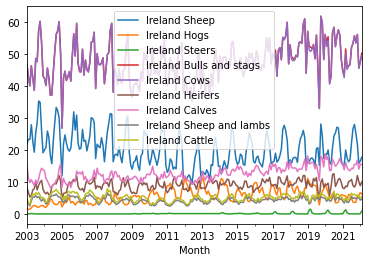

In [8]:
test.plot()

In [9]:
test.isna().sum()

Ireland Sheep              0
Ireland Hogs               0
Ireland Steers             0
Ireland Bulls and stags    0
Ireland Cows               0
Ireland Heifers            0
Ireland Calves             0
Ireland Sheep and lambs    0
Ireland Cattle             0
dtype: int64

In [10]:
animalTypes = np.array(['Cattle', 'Steers', 'Heifers', 'Cows', 'Bulls and stags',
               'Calves', 'Hogs', 'Sheep and lambs'], dtype=object)
animalTypes = 'USA ' + animalTypes

In [11]:
animalTypes

array(['USA Cattle', 'USA Steers', 'USA Heifers', 'USA Cows',
       'USA Bulls and stags', 'USA Calves', 'USA Hogs',
       'USA Sheep and lambs'], dtype=object)

In [12]:
usa = pd.read_excel('data/MeatStatsFullUSA.xlsx', sheet_name='SlaughterWeights-Full',
                   skiprows=2)
dates = usa.iloc[:,0]

usa = usa.iloc[:, 13:]
usa.insert(loc=0, column='Date', value=dates)
usa.drop(columns='Unnamed: 15', inplace=True)
usa.drop(usa.tail(6).index, inplace=True)
usa.drop(usa.head(2).index, inplace=True)
usa.Date = pd.to_datetime(usa.Date, format='%b-%Y')
usa = usa[usa.Date >= '2003-01-01'].reset_index(drop=True)
usa.rename(columns={'Date':'Month'}, inplace=True)
usa.index = usa.Month
usa.drop(columns='Month', inplace=True)
usa.columns=animalTypes
usa

C:\Users\irish\AppData\Local\Temp\ipykernel_31280\1294192013.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  usa = pd.read_excel('data/MeatStatsFullUSA.xlsx', sheet_name='SlaughterWeights-Full',


,USA Cattle,USA Steers,USA Heifers,USA Cows,USA Bulls and stags,USA Calves,USA Hogs,USA Sheep and lambs
Month,,,,,,,,
2022-03-01,836.0,914.0,845.0,655.0,879.0,151.0,218.0,68.0
2022-02-01,842.0,922.0,850.0,658.0,880.0,139.0,218.0,67.0
2022-01-01,843.0,926.0,852.0,649.0,871.0,142.0,219.0,66.0
2021-12-01,841.0,927.0,852.0,635.0,860.0,136.0,218.0,64.0
2021-11-01,837.0,923.0,846.0,621.0,855.0,139.0,216.0,64.0
...,...,...,...,...,...,...,...,...
2003-05-01,733.0,781.0,708.0,594.0,925.0,210.0,200.0,69.0
2003-04-01,731.0,781.0,710.0,598.0,919.0,205.0,200.0,67.0
2003-03-01,745.0,798.0,738.0,598.0,924.0,195.0,200.0,70.0


In [13]:
usa = usa * 1000 / 2204.6

In [14]:
usa

,USA Cattle,USA Steers,USA Heifers,USA Cows,USA Bulls and stags,USA Calves,USA Hogs,USA Sheep and lambs
Month,,,,,,,,
2022-03-01,379.207112,414.587680,383.289486,297.106051,398.711784,68.493151,98.884151,30.844598
2022-02-01,381.928695,418.216457,385.557471,298.466842,399.165381,63.049986,98.884151,30.391001
2022-01-01,382.382292,420.030845,386.464665,294.384469,395.083008,64.410777,99.337748,29.937404
2021-12-01,381.475098,420.484442,386.464665,288.034110,390.093441,61.689195,98.884151,29.030210
2021-11-01,379.660709,418.670054,383.743083,281.683752,387.825456,63.049986,97.976957,29.030210
...,...,...,...,...,...,...,...,...
2003-05-01,332.486619,354.259276,321.146693,269.436632,419.577248,95.255375,90.719405,31.298195
2003-04-01,331.579425,354.259276,322.053887,271.251021,416.855665,92.987390,90.719405,30.391001
2003-03-01,337.929783,361.970425,334.754604,271.251021,419.123651,88.451420,90.719405,31.751792


In [15]:
ireland

,Month,Type of Animal,VALUE
0,2003-01-01,Sheep,4.7
1,2003-01-01,Pigs,22.8
2,2003-01-01,Bullocks,21.9
3,2003-01-01,Bulls,1.6
4,2003-01-01,Cows,8.2
...,...,...,...
2295,2022-02-01,Heifers,15.5
2296,2022-02-01,Calves,0.9
2297,2022-02-01,Lambs,4.7
2298,2022-02-01,Cattle (Including Calves),50.3


In [16]:
allData = pd.concat([test, usa], axis=1)
allData.dropna(inplace=True)
allData

,Ireland Sheep,Ireland Hogs,Ireland Steers,Ireland Bulls and stags,Ireland Cows,Ireland Heifers,Ireland Calves,Ireland Sheep and lambs,Ireland Cattle,USA Cattle,USA Steers,USA Heifers,USA Cows,USA Bulls and stags,USA Calves,USA Hogs,USA Sheep and lambs
Month,,,,,,,,,,,,,,,,,
2003-01-01,21.9,1.6,0.0,46.9,46.9,8.2,15.1,4.1,4.7,348.816112,377.392724,348.816112,270.797424,418.216457,86.637032,90.719405,30.844598
2003-02-01,23.3,1.4,0.0,42.8,42.8,6.8,11.3,3.1,3.6,346.548127,372.403157,344.280142,273.065409,424.113218,88.451420,90.265808,30.844598
2003-03-01,23.3,1.5,0.1,40.1,40.0,5.3,9.8,2.5,2.9,337.929783,361.970425,334.754604,271.251021,419.123651,88.451420,90.719405,31.751792
2003-04-01,27.9,1.9,0.1,46.3,46.3,5.7,10.7,4.1,5.0,331.579425,354.259276,322.053887,271.251021,416.855665,92.987390,90.719405,30.391001
2003-05-01,22.7,2.5,0.1,42.7,42.6,7.5,9.8,5.3,6.2,332.486619,354.259276,321.146693,269.436632,419.577248,95.255375,90.719405,31.298195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,25.2,3.6,0.0,53.5,53.4,9.3,15.4,4.7,5.7,378.299918,417.309262,381.475098,280.776558,391.000635,58.514016,97.069763,28.123016
2021-11-01,21.8,5.5,0.0,56.1,56.1,12.0,16.8,5.0,5.9,379.660709,418.670054,383.743083,281.683752,387.825456,63.049986,97.976957,29.030210
2021-12-01,15.8,5.8,0.0,45.6,45.5,10.1,14.0,5.1,5.7,381.475098,420.484442,386.464665,288.034110,390.093441,61.689195,98.884151,29.030210


<AxesSubplot:xlabel='Month'>

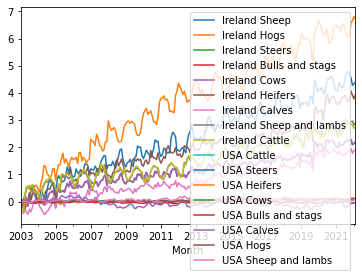

In [17]:
allData.pct_change().cumsum().plot()

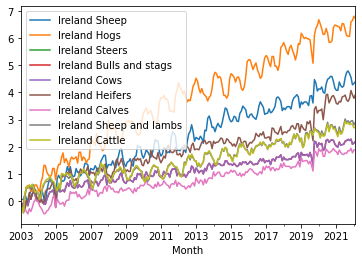

In [18]:
test.pct_change().cumsum().plot();

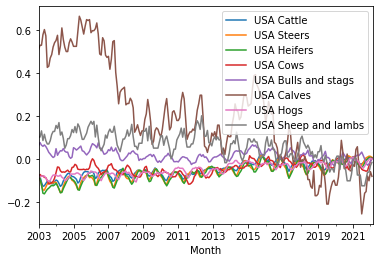

In [19]:
usa.pct_change().cumsum().plot();